# Quantum Search
---
### By:
Sara Metwalli   
Project Researcher   
Keio University   
Tokyo, Japan   

# About Me
---

Sara Ayman Metwalli  
I am 27 years old from Egypt  
Bachelor Degree in Communications and Electronics Engineering in 2014 and Masters Degree in Computer and Communications Engineering from Tokyo Institute of Technology in 2018.  

Now, I work with AQUA (Advancing QUantum Architecture) group in Keio University as a researcher.
<img src="AQUA.png">

For more information about me: https://sara-ayman-metwalli.jimdosite.com  
For more information about AQUA: http://aqua.sfc.wide.ad.jp/home.html

# Introduction
---------------------

Quantum teleportation is one of the practical applications of quantum physics that can be implemented using quantum computers.

Before we get into what is quantum teleportation, or how to implement it in code.

Let's first discuss what is "Quantum" ?

# What is "Quantum Computing"?
----------
Quantum computing is the use of quantum-mechanical phenomena such as superposition and entanglement to perform computation.


What is entanglement? and what does superposition mean?


To explain these important concepts, we first need to understand what is a "Qubit"

<img src="thinking_man.jpg">

## Quantum Bits (Qubits)
---

Qubits to quantum computers are the same as bits for classical computers

Qubits are the simplest version of a mechanical system used as the base of quantum computers. 

How qubits interact together follows the laws of quantum theory. The two most important aspects of that are superposition and entanglement. 

## Quantum Entanglement
---
Particles (atoms, ions) that have interacted at some point in time retain a  connection and can be entangled with each other as a *pair*. 

Knowing the spin state of one entangled particle allows one to know that the spin of its entangled particle is in the opposite direction.

The entaglement remains until one of the qubits is measured!

## Quantum Superposition
---
Imagine the qubit as an electron in a magnetic field. The electron's spin may be either in alignment with the field, which is known as a spin-up state, or opposite to the field, which is known as a spin-down state. 

According to quantum law, the particle then enters a superposition of states, in which it behaves as if it were in both states simultaneously and it stays in that states until it is measured.

# Coding Time
---

How can we represent qubits in code?

Use the Python *Qiskit* Module.

In [7]:
#Codes in this notebook are inspired by Quantum Inspire Website
#This code is written by: Sara A. Metwalli for the Woman Who Code DataPy Conference 2019

#Libraries needed to implement and simulate quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute 
import math as m
import numpy as np
#Custem functions to simplify answers
#import Our_Qiskit_Functions as oq #a part of the libabry presented in arXiv:1903.04359v1.


#Initialize backends simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
Q_simulator = Aer.backends(name='qasm_simulator')[0]

#Create quantum registers (to hold qubits)
q = QuantumRegister(2)
#Classical register to hold classical bits (Used to measure results)
c = ClassicalRegister(2)
#Create a quantum circuit using the above registers
qc = QuantumCircuit(q,c)

In [8]:
#A function to display results in a ket format (as described in arXiv:1903.04359v1)
def Measurement(quantumcircuit, *args, **kwargs): 
	#Displays the measurement results of a quantum circuit 
	p_M = True
	S = 1
	ref = False
	NL = False
	if 'shots' in kwargs:
		S = int(kwargs['shots'])
	if 'return_M' in kwargs:
		ret = kwargs['return_M']
	if 'print_M' in kwargs:
		p_M = kwargs['print_M']
	if 'column' in kwargs:
		NL = kwargs['column']
	M1 = execute(quantumcircuit, M_simulator, shots=S).result().get_counts(quantumcircuit)
	M2 = {}
	k1 = list(M1.keys())
	v1 = list(M1.values())
	for k in np.arange(len(k1)):
		key_list = list(k1[k])
		new_key = ''
		for j in np.arange(len(key_list)):
			new_key = new_key+key_list[len(key_list)-(j+1)]
		M2[new_key] = v1[k]
	if(p_M):
		k2 = list(M2.keys())
		v2 = list(M2.values())
		measurements = ''
		for i in np.arange(len(k2)):
			m_str = str(v2[i])+'|'
			for j in np.arange(len(k2[i])):
				if(k2[i][j] == '0'):
					m_str = m_str + '0' 
				if(k2[i][j] == '1'):
					m_str = m_str + '1'
				if( k2[i][j] == ' ' ):
					m_str = m_str +'>|'
			m_str = m_str + '>   '
			if(NL):
				m_str = m_str + '\n'
			measurements = measurements + m_str
		#print(measurements)
		return measurements
	if(ref):
		return M2
    
    
    
def Wavefunction( obj , *args, **kwargs):
#Displays the waveftmction of the quantum system 
	if(type(obj) == QuantumCircuit ):
		statevec = execute( obj, S_simulator, shots=1 ).result().get_statevector()
	if(type(obj) == np.ndarray):
		statevec = obj
	sys = False
	NL = False
	dec = 5
	if 'precision' in kwargs:
		dec = int( kwargs['precision'] )
	if 'column' in kwargs:
		NL = kwargs['column']
	if 'systems' in kwargs:
		systems = kwargs['systems']
		sys = True
		last_sys = int(len(systems)-1)
		show_systems = []
		for s_chk in np.arange(len(systems)):
			if( type(systems[s_chk]) != int ):
				raise Exception('systems must be an array of all integers')
		if 'show_systems' in kwargs:
			show_systems = kwargs['show_systems']
			if( len(systems)!= len(show_systems) ):
				raise Exception('systems and show_systems need to be arrays of equal length')
			for ls in np.arange(len(show_systems)):
				if((show_systems[ls] != True) and (show_systems[ls] != False)):
					raise Exception('show_systems must be an array of Truth Values')
				if(show_systems[ls] == True):
					last_sys = int(ls) 
		else:
			for ss in np.arange(len(systems)):
				show_systems.append(True)
	wavefunction = ''
	qubits = int(m.log(len(statevec),2))
	for i in np.arange( int(len(statevec))):
		#print(wavefunction)
		value = round(statevec[i].real, dec) + round(statevec[i].imag, dec) * 1j
		if( (value.real != 0) or (value.imag != 0)):
			state = list(format(int(i),f"0{int(2**qubits)}b"))
			state.reverse()
			state_str = ''
			#print(state)
			if( sys == True ): #Systems and SharSystems 
				k = 0 
				for s in np.arange(len(systems)):
					if(show_systems[s] == True):
						if(int(s) != last_sys):
							state.insert(int(k + systems[s]), '>|' )
							k = int(k + systems[s] + 1)
						else:
							k = int(k + systems[s]) 
					else:
						for s2 in np.arange(systems[s]):
							del state[int(k)]
			for j in np.arange(len(state)):
				if(type(state[j])!= str):
					state_str = state_str + str(int(state[j])) 
				else:
					state_str = state_str + state[j]
			#print(state_str)
			#print(value)
			if( (value.real != 0) and (value.imag != 0) ):
				if( value.imag > 0):
					wavefunction = wavefunction + str(value.real) + '+' + str(value.imag) + 'j |' + state_str + '>   '
				else:
					wavefunction = wavefunction + str(value.real) + '' + str(value.imag) + 'j |' + state_str +  '>   '
			if( (value.real !=0 ) and (value.imag ==0) ):
				wavefunction = wavefunction  + str(value.real) + '  |' + state_str + '>   '
			if( (value.real == 0) and (value.imag != 0) ):
				wavefunction = wavefunction + str(value.imag)  + 'j |' + state_str + '>   '
			if(NL):
				wavefunction = wavefunction + '\n'
		#print(NL)
	
	#print(wavefunction)
	return wavefunction

# Quantum Gates
---

Programing quantum computers is now done on a gate level, similar to classical gates.

Now

Let's talk about most common quantum gates

## Identity Operator
---

The identity operator leaves the state unchanged, it is mostly used to initialize qubits to zero.

| input     | output  |
|---------  |-------  |
| 0         | 0       |
| 1         | 1       |


1.0  |0000>   


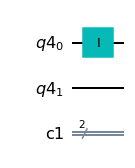

In [9]:
#1- Iden operator
qc.id(q[0])
print(Wavefunction(qc))
qc.draw()

## NOT Gate
---

The NOT gate takes a qubits and flips its state!

| input   | output|
|---------|-------|
| 0       | 1     |
| 1       | 0     |


1.0  |0000>   


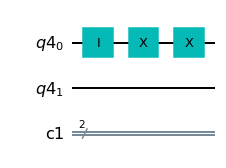

In [11]:
#2- NOT gate
qc.x(q[0])
print(Wavefunction(qc))
qc.draw()

## Controlled-NOT Gate (Toffoli Gate)
---

The controlled-NOT functionality is described using this truth-table:

| control in 	| target bit 	| control out 	| output 	|
|------------	|------------	|-------------	|--------	|
| 0          	| 0          	| 0           	| 0      	|
| 0          	| 1          	| 0           	| 1      	|
| 1          	| 0          	| 1           	| 1      	|
| 1          	| 1          	| 1           	| 0      	|

Example:

CNOT  |00> ===> |00>  
CNOT  |01> ===> |01>  
CNOT  |10> ===> |11>  
CNOT  |11> ===> |10>  

1.0  |0000>   


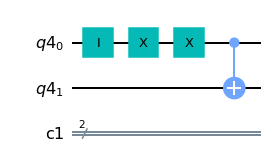

In [12]:
#3- Controlled-NOT
qc.cx(q[0],q[1])
print(Wavefunction(qc))
qc.draw()

## The Hadamard Gate
---

The Hadamard gate takes a qubit and returns an equal superposition of |0> and |1>.

0.70711  |0000>   0.70711  |0100>   


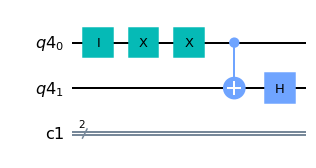

In [13]:
#4- Hadamard
qc.h(q[1])
print(Wavefunction(qc))
qc.draw()

# Quantum basis
---

|0> base is the zero state  
|1> base is the one state  
|+> base is the Hadamard of the |0> state  
|-> base is the Hadamard of the |1> state  

$$
\begin{array}{l}{|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)} \\ {|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)}\end{array}$$

Phew...

That was a lot!!

# Quantum Search
---
Imagine you have to decrypt a secret message. Unfortunately, the message is encrypted using a 12-digit secret key. But you don’t know the secret key. The only way to unlock the message is by searching through the 
$$ N = 10^{12}$$
(one trillion) possible keys. While you may get lucky and find the right key early on, on average you’ll need to try N/2 different keys, and in the worst case you’ll need to try all N.   
On a conventional classical computer, if we have a search space of N items, we need to examine the search space on the order of N times to find the item we’re looking for. It turns out that you can use a quantum computer to solve the search problem after examining the search space roughly 
$$\sqrt{N}$$
times! 

## Grover's Search
---
In mathematical terms, Grover's algorithm solves the problem of an unstructured search. It is a quantum algorithm for finding the input value $$x_0$$ of an Oracle function f(x) where $$f(x_0)=1$$ and f(x)=0 for all other values of x.

Grover's algorithm is a probabilistic algorithm that repeats every N/2 period.
To boost the correct answer, the algorithm must be repeated an optimal iteration time that varies based on the number of input qubits, and the number of correct answers wanted from the algorithm. 

## Algorithm Construction
---
<img src="grover.jpeg">

## The Problem
---
Let's look at a concrete example. Let's say our Oracle is a function that returns a 1 (true) only for an input value of the decimal number 5 (Binary 101) and 0 (false) for all other possible inputs between 0 and 7.

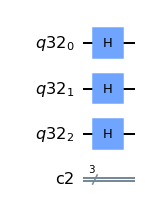

In [14]:
#The Initialization code
# Create a Quantum Register and classical registers with 3 qubits and 3 classical bits.
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

#Put the input data in superposition
qc.h(q)
qc.draw(output = "mpl")

### The Oracle
---
We need an oracle (a series of gates) that returns 1 only for input |101>.

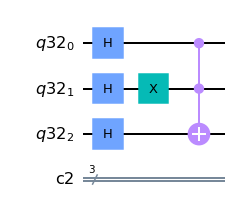

In [15]:
#The Oracle Circuit
qc.x(q[1])
qc.ccx(q[0],q[1],q[2])
qc.draw(output = "mpl")

### The Diffusion Operator
---
also called amplitude purification, which calculates the mean probability amplitude μ of all states and inverts the probability amplitudes around this mean. This actually amplifies the probability amplitude of the target state.

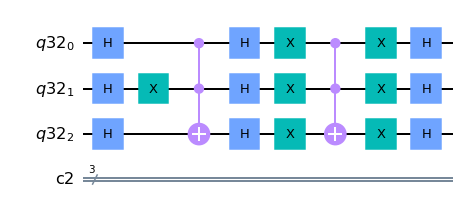

In [16]:
#Diffusion Circuit
qc.h(q)
qc.x(q)
qc.ccx(q[0],q[1],q[2])
qc.x(q)
qc.h(q)
qc.draw(output = "mpl")

### Algorithm Iterations
---
The reason we will need many Grover Iterations as our problem size gets larger, is because each individual iteration will only
boost the probability of our marked state by so much. Consider the diagram below, which shows that a single Grover Iteration is
not enough to give our marked state a significant probability
<img src="g1.png">
Too many Grover Iterations will make
things worse, so we need to never go over the optimal amount. Luckily for us, there is a well known trend that tells us when to
stop, for a system of N states and k answers:
$$Optimal steps = \pi/4\sqrt{N/k}$$

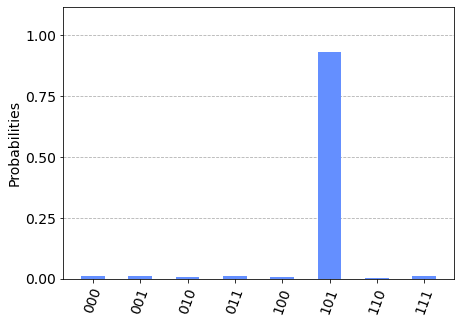

In [17]:
#The full code
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import math as m
import re
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
#import Our_Qiskit_Functions as oq #user-defined functions build by arXiv:1903.05195
from qiskit.tools.visualization import plot_histogram
#Initialize backends
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

#The oracle for this problem as a function
def ora(qcc,q):
    qcc.x(q[1])
    qcc.h(q[2])
    qcc.ccx(q[0],q[1],q[2])
    qcc.h(q[2])
    qcc.x(q[1])

#The diffusion operator as a function
def dif(qcc,q):
    qcc.h(q)
    qcc.x(q)
    qcc.h(q[2])
    qcc.ccx(q[0],q[1],q[2])
    qcc.h(q[2])
    qcc.x(q)
    qcc.h(q)

#Initializing the qubits, classical bits and build the quantum circuit
n = 3 #number of qubits (number of digits in the answer)
input_qubits = QuantumRegister(n, name='input')
clas = ClassicalRegister(n, name='class')
qqc = QuantumCircuit(input_qubits,clas)
qqc.h(input_qubits) #initilaize qubits in superposition

N = 2**n #Get the total number of superposition states
iterations = round(m.pi/4*m.sqrt(N)) #optimal iteration count

#Repeat the algorithm the optimal number of iterations
for i in range(iterations):
    ora(qqc,input_qubits)
    dif(qqc,input_qubits)
    
#Measure the answer    
qqc.measure(input_qubits,clas)
Measurement(qqc,shots=1024) #Displays measurement in ket-notation 
qqc.draw(output = "mpl") #Final circuit

#Execute the circuit
ex = execute(qqc, M_simulator, shots = 1024)
res = ex.result()
M = res.get_counts(qqc)

#Plot the results
plot_histogram(M, bar_labels=False)

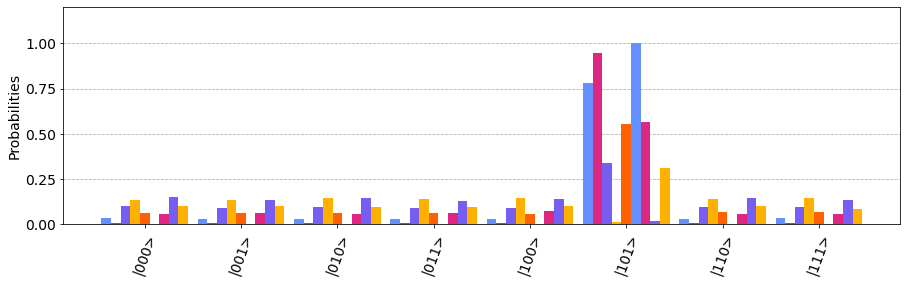

In [18]:
#Grover with different iterations
l = [] #a list to store different number of iterations results
def grover(x): # X >> Number of iterations
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)
    # Initializing i/p qubits in superposition
    qc.h(q)
    qc.barrier()
    # Calculate iteration count
    for i in range(x):
        qc.barrier()
        ora(qc, q)
        qc.barrier()
        dif(qc,q)
    return qc, q, c

#============================================================================================================
iterations = round(m.pi/4*m.sqrt(N))
for i in range(1,10):
    qc, q, c = grover(i)
    qc.measure(q,c)
    #Executing circuit and show results
    ex = execute(qc, M_simulator, shots = 5000)
    res = ex.result()
    M = res.get_counts(qc)
    #printing measurements results
    s = Measurement(qc,shots=5000)
    pattern = "\d+\|\d+\>"
    res = re.findall(pattern,s)
    dct = {}
    for item in res:
      dct[item[item.index("|"):]]= int(item[:item.index("|")])
    l.append(dct)
#-----------------------------------------------------------------------------------------------------------
plot_histogram(l, bar_labels=False,figsize=(15, 4))

## References:
---
1. Qiskit. “Qiskit/Qiskit-Tutorials.” GitHub, 20 July 2019, https://github.com/Qiskit/iqx-user-guide/blob/master/rst/full-user-guide/004-Quantum_Algorithms/070-Grover's_Algorithm.rst.
2. Koch, Daniel, Laura Wessing, and Paul M. Alsing. "Introduction to Coding Quantum Algorithms: A Tutorial Series Using Pyquil." arXiv preprint arXiv:1903.05195 (2019).
3. Voorhoede, D. (n.d.). Code example: Grover's algorithm. Retrieved from https://www.quantum-inspire.com/kbase/grover-algorithm/.
4.Matuschak , A., & Nielsen, M. (1970, January 1). How the quantum search algorithm works. Retrieved from https://quantum.country/search.
5. All pictures used are from Google image search